In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt  

In [2]:
path = r'train.csv/train.csv'
df = pd.read_csv(path)
df.shape

(404290, 6)

In [4]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
398574,398574,531806,531807,I am hindu I am in relationship from last 8 ye...,I am a 24-year-old Hindu girl. I want to marry...,0
114720,114720,12623,63816,How do I use Reddit efficiently?,What is Reddit and how do I use it?,1
139772,139772,222259,222260,Do any galaxies appear blueshifted?,Psychopaths: what words would you use to descr...,0
253975,253975,16416,132600,What are the best books for preparing for IBPS...,"What are the best books for IBPS PO, SBI SO, S...",1
186428,186428,284352,94059,Why does Nidhi Razdan (NDTV anchor) do such po...,Why are you defaming people ?,0
260642,260642,376628,36612,What does Richard Muller think about dark matt...,How old was Richard Muller when he first learn...,0
382006,382006,513803,513804,Are there any good game programming colleges i...,Which are the best colleges in India for game ...,1
222017,222017,329481,87028,Where do countries borrow money from?,Where are countries borrowing money from?,1
197352,197352,298289,298290,Is 4 GHz processor is two times faster than 2 ...,If a PC A has 2.0GHz clock speed and PC B has ...,0
148684,148684,234372,234373,What is the best way to learn data structures?,How do I start learning data structures?,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [6]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [8]:
# duplicate rows
df.duplicated().sum()

0

In [9]:
# Distribution of duplicate and non-duplicate questions
df['is_duplicate'].value_counts()

0    255027
1    149263
Name: is_duplicate, dtype: int64

<AxesSubplot:>

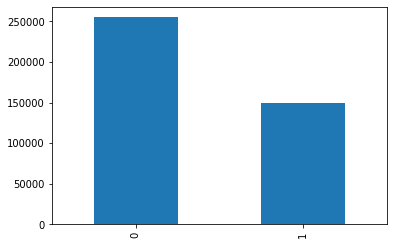

In [14]:
df['is_duplicate'].value_counts()/df['is_duplicate'].count()*100
df['is_duplicate'].value_counts().plot(kind='bar')

In [12]:
# Repeated questions
qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions: ', np.unique(qid).shape[0])
x = qid.value_counts() > 1 
print("Number of questions getting repeated : ", x[x].shape[0])

Number of unique questions:  537933
Number of questions getting repeated :  111780


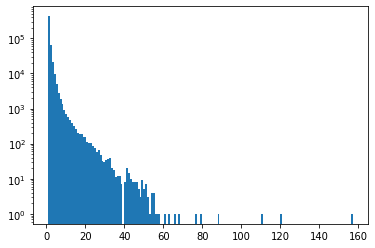

In [13]:
# Repeated questions histogram 
plt.hist(qid.value_counts().values, bins=160)
plt.yscale('log')
plt.show()

In [15]:
df['is_duplicate'].value_counts()

0    255027
1    149263
Name: is_duplicate, dtype: int64

In [16]:
df['qid1'].value_counts()

8461      50
14110     48
1749      47
20628     47
25984     47
          ..
223037     1
223039     1
223041     1
223043     1
537932     1
Name: qid1, Length: 290654, dtype: int64

In [17]:
df['qid2'].value_counts()

30782     120
2559      115
4044      100
2561       71
17978      66
         ... 
221429      1
221433      1
133300      1
221437      1
537933      1
Name: qid2, Length: 299364, dtype: int64

### Only Bag of Words

In [3]:
new_df = df.sample(30000).dropna()

In [4]:
ques_df = new_df[['question1', 'question2']]
ques_df.head()

,question1,question2
65226,"Why is the line ""but I was going to Tosche Sta...",How did Rey become proficient in the Force so ...
115718,How do Bernie Sanders and Donald Trump differ ...,What are the differences between the global tr...
355380,What is JNU website?,What is JNU?
104521,Is GDP a good measure of a nation's wealth/sta...,How do you know when the debt/GDP ratio will s...
55785,What are the top 30 most profitable (high gros...,What are the top 10 most profitable (high gros...


In [5]:
from sklearn.feature_extraction.text import CountVectorizer 
# merge texts 
questions  = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(), 2)

In [6]:
temp_df1 = pd.DataFrame(q1_arr, index=ques_df.index) 
temp_df2 = pd.DataFrame(q2_arr, index=ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1) 
temp_df.shape

(30000, 6000)

In [7]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
65226,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
115718,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
355380,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104521,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
55785,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
temp_df['is_duplicate'] = new_df['is_duplicate']

In [9]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
65226,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
115718,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
355380,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104521,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
55785,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [10]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(temp_df.iloc[:,0:-1].values, temp_df.iloc[:,-1].values, test_size=0.3, random_state=True)

In [11]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score 
rf = RandomForestClassifier() 
rf.fit(X_train, y_train) 
y_pred = rf.predict(X_test) 
accuracy_score(y_test, y_pred)

0.7461111111111111

In [14]:
from xgboost import XGBClassifier 
xgb = XGBClassifier()
xgb.fit(X_train, y_train) 
y_pred = xgb.predict(X_test) 
accuracy_score(y_test, y_pred) 

0.735

### Bag of Words with Basic Features

In [21]:
new_df = df.sample(30000).dropna()

In [23]:
new_df.shape

(30000, 6)

In [24]:
new_df.duplicated().sum()

0

0    18868
1    11132
Name: is_duplicate, dtype: int64
0    62.893333
1    37.106667
Name: is_duplicate, dtype: float64


<AxesSubplot:>

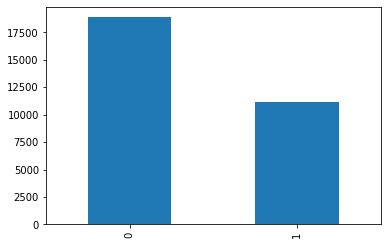

In [25]:
print(new_df['is_duplicate'].value_counts())
print((new_df['is_duplicate'].value_counts()/new_df['is_duplicate'].count())*100)
new_df['is_duplicate'].value_counts().plot(kind='bar')

In [26]:
# Repeats 
qid = pd.Series(new_df['qid1'].tolist() + new_df['qid2'].tolist()) 
print("Number of unique questions", np.unique(qid).shape[0]) 
x = qid.value_counts()> 1
print("Number of questions getting repeated", x[x].shape[0])

Number of unique questions 55263
Number of questions getting repeated 3545


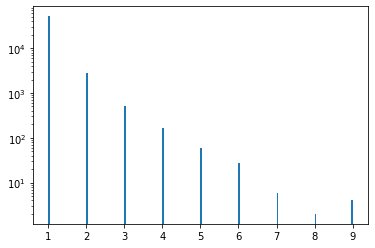

In [27]:
# Repeated questions histogram 
plt.hist(qid.value_counts().values, bins=160) 
plt.yscale('log') 
plt.show()

In [29]:
# Feature Engineering 
new_df['q1_len'] = new_df['question1'].str.len() 
new_df['q2_len'] = new_df['question2'].str.len()

In [30]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
70795,70795,121937,121938,What is the last job that robots take over?,What jobs will there be in 2050 that haven't b...,0,43,71
72420,72420,124434,124435,Do people who personally know Donald Trump lik...,Is Donald Trump a good person?,0,52,30
136419,136419,217666,217667,"What is the difference between ""Almighty God"" ...",What is difference between god and almighty?,1,65,44
355772,355772,5359,66410,What are the best things to do when working on...,"What's the best, most effective tips for losin...",1,61,55
29168,29168,54002,54003,What is dark night?,If there are almost an infinite number of star...,0,19,76


In [31]:
new_df['q1_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_words'] = new_df['question2'].apply(lambda row: len(row.split(" "))) 
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words,q2_words
70795,70795,121937,121938,What is the last job that robots take over?,What jobs will there be in 2050 that haven't b...,0,43,71,9,14
72420,72420,124434,124435,Do people who personally know Donald Trump lik...,Is Donald Trump a good person?,0,52,30,9,6
136419,136419,217666,217667,"What is the difference between ""Almighty God"" ...",What is difference between god and almighty?,1,65,44,10,7
355772,355772,5359,66410,What are the best things to do when working on...,"What's the best, most effective tips for losin...",1,61,55,12,9
29168,29168,54002,54003,What is dark night?,If there are almost an infinite number of star...,0,19,76,4,15


In [32]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" "))) 
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return len(w1 & w2)

In [33]:
new_df['common_words'] = new_df.apply(common_words, axis=1) 
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words,q2_words,common_words
70795,70795,121937,121938,What is the last job that robots take over?,What jobs will there be in 2050 that haven't b...,0,43,71,9,14,2
72420,72420,124434,124435,Do people who personally know Donald Trump lik...,Is Donald Trump a good person?,0,52,30,9,6,2
136419,136419,217666,217667,"What is the difference between ""Almighty God"" ...",What is difference between god and almighty?,1,65,44,10,7,5
355772,355772,5359,66410,What are the best things to do when working on...,"What's the best, most effective tips for losin...",1,61,55,12,9,3
29168,29168,54002,54003,What is dark night?,If there are almost an infinite number of star...,0,19,76,4,15,1


In [34]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" "))) 
    w2 = set(map(lambda word: word.lower().strip(), row["question2"].split(" "))) 
    return (len(w1) + len(w2))

In [35]:
new_df["total_words"] = new_df.apply(total_words, axis=1) 
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words,q2_words,common_words,total_words
70795,70795,121937,121938,What is the last job that robots take over?,What jobs will there be in 2050 that haven't b...,0,43,71,9,14,2,23
72420,72420,124434,124435,Do people who personally know Donald Trump lik...,Is Donald Trump a good person?,0,52,30,9,6,2,15
136419,136419,217666,217667,"What is the difference between ""Almighty God"" ...",What is difference between god and almighty?,1,65,44,10,7,5,17
355772,355772,5359,66410,What are the best things to do when working on...,"What's the best, most effective tips for losin...",1,61,55,12,9,3,21
29168,29168,54002,54003,What is dark night?,If there are almost an infinite number of star...,0,19,76,4,15,1,19


In [36]:
new_df['shared_words'] = round(new_df['common_words']/new_df['total_words'], 2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words,q2_words,common_words,total_words,shared_words
70795,70795,121937,121938,What is the last job that robots take over?,What jobs will there be in 2050 that haven't b...,0,43,71,9,14,2,23,0.09
72420,72420,124434,124435,Do people who personally know Donald Trump lik...,Is Donald Trump a good person?,0,52,30,9,6,2,15,0.13
136419,136419,217666,217667,"What is the difference between ""Almighty God"" ...",What is difference between god and almighty?,1,65,44,10,7,5,17,0.29
355772,355772,5359,66410,What are the best things to do when working on...,"What's the best, most effective tips for losin...",1,61,55,12,9,3,21,0.14
29168,29168,54002,54003,What is dark night?,If there are almost an infinite number of star...,0,19,76,4,15,1,19,0.05
